In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs
from pandas.tools.plotting import parallel_coordinates

from scipy import stats

## Load data: 

In [16]:
# CLIMATE DAU 
partida_dau = pd.read_csv("dades/dades_csv/climatedau/game_partida.csv", delimiter=',' , encoding="latin-1")
ronda_dau = pd.read_csv("dades/dades_csv/climatedau/game_ronda.csv", delimiter=',' , encoding="latin-1")
user_dau = pd.read_csv("dades/dades_csv/climatedau/game_user.csv", delimiter=',' , encoding="latin-1")

user_dau.drop(user_dau.index[3], inplace=True)
userronda_dau = pd.read_csv("dades/dades_csv/climatedau/game_userronda.csv", delimiter=',' , encoding="latin-1")

eq_user_dau = pd.read_csv("dades/eq_user_dau.csv", delimiter=',' , encoding="latin-1")
ineq_user_dau = user_dau[~user_dau.user_id.isin(eq_user_dau['user_id'])]

# CLIMATE STREET 
partida_street = pd.read_csv("dades/dades_csv/climatestreet/game_partida_street.csv", delimiter=',' , encoding="latin-1")
ronda_street = pd.read_csv("dades/dades_csv/climatestreet/game_ronda_street.csv", delimiter=',' , encoding="latin-1")
user_street = pd.read_csv("dades/dades_csv/climatestreet/game_user_street.csv", delimiter=',' , encoding="latin-1")
user_street.drop(user_street[user_street['diners_inicials']== 0].index, inplace=True)
userronda_street = pd.read_csv("dades/dades_csv/climatestreet/game_userronda_street.csv", delimiter=',' , encoding="latin-1")

# CLIMATE VIL
partida_vil = pd.read_csv("dades/dadesvil/partida.csv", delimiter=',' , encoding="latin-1")
ronda_vil = pd.read_csv("dades/dadesvil/ronda.csv", delimiter=',' , encoding="latin-1")
user_vil = pd.read_csv("dades/dadesvil/user.csv", delimiter=',' , encoding="latin-1")
user_vil.drop(user_vil[user_vil['diners_inicials']== 0].index, inplace=True)
userronda_vil = pd.read_csv("dades/dadesvil/userronda.csv", delimiter=',' , encoding="latin-1")

user_street.rename(columns={'id': 'user_id'}, inplace=True)
user_vil.rename(columns={'id': 'user_id'}, inplace=True)

In [17]:
def contribution_round(user, userronda, norm):
    tonorm = user[['user_id','diners_inicials']]
    tocontr = pd.merge(userronda,tonorm, on = 'user_id')
    #Normalization
    tocontr['selnorm'] = (tocontr['seleccio']/tocontr['diners_inicials'])*10
    rondes = np.arange(1,11)
    ronda_id = np.tile(rondes,len(np.unique(userronda['user_id']))) #324 users
    tocontr['ronda_id'] = ronda_id
    contr_round = pd.pivot(index = tocontr['user_id'], columns = tocontr['ronda_id'], values = tocontr[norm])
    return contr_round

In [28]:
# Normalized contributions per round
## DAU
contr_dau_norm = contribution_round(user_dau,userronda_dau, 'selnorm')
contr_dau = contribution_round(user_dau,userronda_dau, 'seleccio')

## DAU eq: 
eq_dau = pd.read_csv("dades/eq_dau.csv", delimiter=',' , encoding="latin-1")
eq_contr_dau = eq_dau.iloc[:,2:12]
eq_contr_dau = eq_contr_dau.set_index(eq_dau.user_id)
eq_contr_dau_norm = contr_dau_norm[contr_dau_norm.index.isin(eq_dau['user_id'])]
namesList = [np.linspace(1,10,10,dtype=int)]
eq_contr_dau.columns = namesList
eq_contr_dau_norm.columns = namesList

## DAU ineq:
ineq_dau = pd.read_csv("dades/ineq_dau.csv", delimiter=',' , encoding="latin-1")
ineq_contr_dau = ineq_dau.iloc[:,2:12]
ineq_contr_dau = ineq_contr_dau.set_index(ineq_dau.user_id)
ineq_contr_dau_norm = contr_dau_norm[contr_dau_norm.index.isin(ineq_dau['user_id'])]
ineq_contr_dau.columns = namesList
ineq_contr_dau_norm.columns = namesList

## STREET
contr_street_norm = contribution_round(user_street,userronda_street, 'selnorm')
contr_street = contribution_round(user_street,userronda_street, 'seleccio')

## VIL
contr_vil_norm = contribution_round(user_vil,userronda_vil, 'selnorm')
contr_vil = contribution_round(user_vil,userronda_vil, 'seleccio')

In [19]:
### Ronda 0: 
ronda_dau0 = pd.read_csv("dades/ronda_dau_0.csv", delimiter=',' , encoding="latin-1")
ronda_street0 = pd.read_csv("dades/ronda_street_0.csv", delimiter=',' , encoding="latin-1")
ronda_vil0 = pd.read_csv("dades/ronda_vil_0.csv", delimiter=',' , encoding="latin-1")

In [20]:
daur = pd.read_csv("dades/dau_r.csv", delimiter=',' , encoding="latin-1")
streetr = pd.read_csv("dades/street_r.csv", delimiter=',' , encoding="latin-1")
vilr = pd.read_csv("dades/vil_r.csv", delimiter=',' , encoding="latin-1")

In [21]:
def dataset_2(ds_r,user_ds):
    table1 = ds_r[['user_id','partida_id','mean_contr']]
    table2 = user_ds[['user_id', 'genere', 'rang_edat','prfinal1','prfinal2','prfinal3','prfinal4','prfinal5','prfinal6',
                     'prfinal7','prfinal8','prfinal9','prfinal10','prfinal11','prfinal12','prfinal13','prfinal14','prfinal15']]
    ds_2 = table1.merge(table2, on = 'user_id')
    ds_2['genere'] =ds_2['genere'].map({'d': 1, 'h': 0})
    ds_2['prfinal1'] =ds_2['prfinal1'].map({'r1': 1, 'r2': 2, 'r3':3, 'nan':0})
    ds_2['prfinal2'] =ds_2['prfinal2'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal3'] =ds_2['prfinal3'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal4'] =ds_2['prfinal4'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal5'] =ds_2['prfinal5'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal6'] =ds_2['prfinal6'].map({'r1': 1, 'r2': 2, 'r3':3,'nan':0})
    ds_2['prfinal7'] =ds_2['prfinal7'].map({'r1': 1, 'r2': 2, 'r3':3,'nan':0})
    ds_2['prfinal8'] =ds_2['prfinal8'].map({'r1': 1, 'r2': 2, 'r3':3,'nan':0})
    ds_2['prfinal9'] =ds_2['prfinal9'].map({'r1': 1, 'r2': 2, 'r3':3,'nan':0})
    ds_2['prfinal10'] =ds_2['prfinal10'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal11'] =ds_2['prfinal11'].map({'r1': 1, 'r4': 3, 'r3':2,'nan':0})
    ds_2['prfinal12'] =ds_2['prfinal12'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal13'] =ds_2['prfinal13'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal14'] =ds_2['prfinal14'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal15'] =ds_2['prfinal15'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    return(ds_2)

In [22]:
## Table with question results (numeric format):
ds_2_dau = dataset_2(daur,user_dau)
ds_2_street = dataset_2(streetr,user_street)

user_vil.rename(columns={'enquesta_final_pr1': 'prfinal1', 'enquesta_final_pr2': 'prfinal2','enquesta_final_pr3': 'prfinal3',
                        'enquesta_final_pr4': 'prfinal4','enquesta_final_pr5': 'prfinal5','enquesta_final_pr6': 'prfinal6',
                        'enquesta_final_pr7': 'prfinal7','enquesta_final_pr8': 'prfinal8','enquesta_final_pr9': 'prfinal9',
                        'enquesta_final_pr10': 'prfinal10','enquesta_final_pr11': 'prfinal11','enquesta_final_pr12': 'prfinal12',
                        'enquesta_final_pr13': 'prfinal13',}, inplace=True)

table1 = vilr[['user_id','partida_id','mean_contr']]
table2 = user_vil[['user_id', 'genere', 'rang_edat','prfinal1','prfinal2','prfinal3','prfinal4','prfinal5','prfinal6',
                 'prfinal7','prfinal8','prfinal9','prfinal10','prfinal11','prfinal12','prfinal13']]
ds_2_vil = table1.merge(table2, on = 'user_id')
ds_2_vil['genere'] =ds_2_vil['genere'].map({'F': 1, 'M': 0})

In [23]:
## Table with the ending round of each game:
final_dau = pd.DataFrame({'ronda_obj':ronda_dau0.groupby('partida_id').last()['num_ronda'],
                            'partida_id':np.unique(ronda_dau0['partida_id'])})

final_street = pd.DataFrame({'ronda_obj':ronda_street0.groupby('partida_id').last()['num_ronda'],
                            'partida_id':np.unique(ronda_street0['partida_id'])})

final_vil = pd.DataFrame({'ronda_obj':ronda_vil0.groupby('partida_id').last()['num_ronda'],
                            'partida_id':np.unique(ronda_vil0['partida_id'])})

In [24]:
## Table with total contribution of a game per round:
ronda_dau_data = pd.read_csv("dades/ronda_dau_partida.csv", delimiter=',' , encoding="latin-1")
ronda_street_data = pd.read_csv("dades/ronda_street_partida.csv", delimiter=',' , encoding="latin-1")
ronda_vil_data = pd.read_csv("dades/ronda_vil_partida.csv", delimiter=',' , encoding="latin-1")

partides_info_dau = ronda_dau_data.pivot(index='partida_id', columns='num_ronda', values= "bucket")
partides_info_street = ronda_street_data.pivot(index='partida_id', columns='num_ronda', values= "bucket")
partides_info_vil = ronda_vil_data.pivot(index='partida_id', columns='num_ronda', values= "bucket")

In [30]:
## Datasets: Heterogeneous, Homogeneous, Heterogeneous norm, Homogeneous norm
ineq_contr_dau_2= ineq_contr_dau.assign(experiment='het_dau')
contr_street_2= contr_street.assign(experiment='street')
frames_het = [ineq_contr_dau_2, contr_street_2]
heterogeneous = pd.concat(frames_het)

eq_contr_dau_2= eq_contr_dau.assign(experiment='hom_dau')
contr_vil_2= contr_vil.assign(experiment='vil')
frames_hom = [eq_contr_dau_2, contr_vil_2]
homogeneous = pd.concat(frames_hom)

ineq_contr_dau_2= ineq_contr_dau_norm.assign(experiment='het_dau')
contr_street_2= contr_street_norm.assign(experiment='street')
frames_het = [ineq_contr_dau_2, contr_street_2]
heterogeneous_norm = pd.concat(frames_het)

eq_contr_dau_2= eq_contr_dau_norm.assign(experiment='hom_dau')
contr_vil_2= contr_vil_norm.assign(experiment='vil')
frames_hom = [eq_contr_dau_2, contr_vil_2]
homogeneous_norm = pd.concat(frames_hom)

In [25]:
## Table with clustering information of each user
categ_het = pd.read_csv("dades/categ_het.csv", delimiter=',' , encoding="latin-1", index_col= 0)
categ_hom = pd.read_csv("dades/categ_hom.csv", delimiter=',' , encoding="latin-1", index_col= 0)

In [12]:
#Table of frequencies of each cluster per game. 
#categ_het[categ_het['experiment']=='het_dau'].groupby(['partida_id'])['clust_coef'].value_counts().sort_index()

In [13]:
37/162

0.22839506172839505

### Data exploration: 

- Mean and sd of age and education
- Mean contribution per user
- Mean contribution at each round
- Accumulated contribution

#### Mean and sd of age and education

In [18]:
print('Mean age in DAU:',user_dau.rang_edat.mean())
print('SD age in DAU:',user_dau.rang_edat.std())

Mean age in DAU: 32.31481481481482
SD age in DAU: 13.165520322136803


In [19]:
print('Mean age in STREET:',user_street.rang_edat.mean())
print('SD age in STREET:',user_street.rang_edat.std())

Mean age in STREET: 29.185185185185187
SD age in STREET: 14.514026826892016


In [21]:
#print('Mean age in VIL:',user_vil.rang_edat.mean())
#print('SD age in VIL:',user_vil.rang_edat.std())

#### Mean contribution per user

In [16]:
#Normalized mean contribution per user:
mean_contr_user_dau = contr_dau_norm.mean(axis=1)
mean_contr_user_street = contr_street_norm.mean(axis=1)
mean_contr_user_vil = contr_vil_norm.mean(axis=1)

In [17]:
%matplotlib inline
plt.style.use('seaborn-whitegrid')

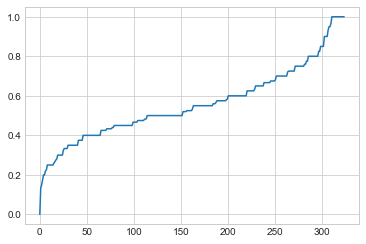

In [18]:
# Mean contribution per user: DAU
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, len(np.unique(userronda_dau['user_id'])), len(np.unique(userronda_dau['user_id'])))
ax.plot(x, np.sort(mean_contr_user_dau))

In [19]:
mean_contr_user_dau.describe()

count    324.000000
mean       0.557860
std        0.184889
min        0.000000
25%        0.450000
50%        0.529167
75%        0.666667
max        1.000000
dtype: float64

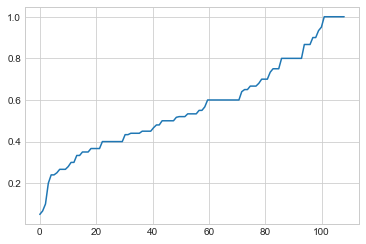

In [20]:
# Mean contribution per user: STREET
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, len(np.unique(userronda_street['user_id'])), len(np.unique(userronda_street['user_id'])))
ax.plot(x, np.sort(mean_contr_user_street))

In [21]:
mean_contr_user_street.describe()

count    108.000000
mean       0.565062
std        0.226579
min        0.050000
25%        0.400000
50%        0.533333
75%        0.708333
max        1.000000
dtype: float64

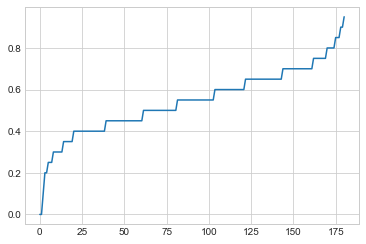

In [22]:
# Mean contribution per user: VIL
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, len(np.unique(userronda_vil['user_id'])), len(np.unique(userronda_vil['user_id'])))
ax.plot(x, np.sort(mean_contr_user_vil))

In [23]:
mean_contr_user_vil.describe()

count    180.000000
mean       0.543056
std        0.160374
min        0.000000
25%        0.450000
50%        0.550000
75%        0.650000
max        0.950000
dtype: float64

#### Mean contribution per round

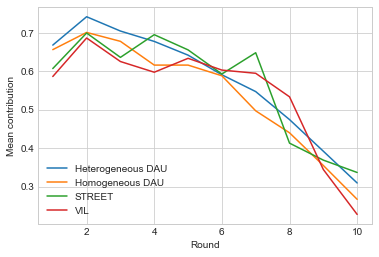

In [24]:
# Mean contribution per round
mean_contr_dau = contr_dau.mean(axis=0)
mean_contr_street= contr_street_norm.mean(axis=0)
mean_contr_vil = contr_vil_norm.mean(axis=0)
mean_contr_eq = eq_contr_dau_norm.mean(axis=0)
mean_contr_ineq= ineq_contr_dau_norm.mean(axis=0)

#Plot
fig = plt.figure()
ax = plt.axes()

x = np.linspace(1, 10, 10)
ax.plot(x, mean_contr_ineq,label="Heterogeneous DAU")
ax.plot(x, mean_contr_eq,label="Homogeneous DAU")
ax.plot(x, mean_contr_street,label="STREET")
ax.plot(x, mean_contr_vil,label="VIL")
plt.xlabel('Round')
plt.ylabel('Mean contribution')
plt.legend()
plt.show()

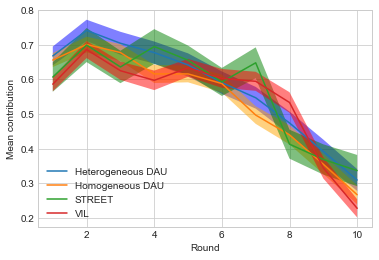

In [25]:
## Standard deviation of each dataset
sigma_ineq = ineq_contr_dau_norm.std(axis=0)
sigma_eq = eq_contr_dau_norm.std(axis=0)
sigma_street = contr_street_norm.std(axis=0)
sigma_vil = contr_vil_norm.std(axis=0)

## Standard error of each dataset
se_ineq = stats.sem(ineq_contr_dau_norm)
se_eq = stats.sem(eq_contr_dau_norm)
se_street = stats.sem(contr_street_norm)
se_vil = stats.sem(contr_vil_norm)

## Plot:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(1, 10, 10)
ax.plot(x, mean_contr_ineq,label="Heterogeneous DAU")
ax.plot(x, mean_contr_eq,label="Homogeneous DAU")
ax.plot(x, mean_contr_street,label="STREET")
ax.plot(x, mean_contr_vil,label="VIL")
ax.fill_between(x, mean_contr_ineq+se_ineq, mean_contr_ineq-se_ineq, facecolor='blue', alpha=0.5)
ax.fill_between(x, mean_contr_eq+se_eq, mean_contr_eq-se_eq, facecolor='orange', alpha=0.5)
ax.fill_between(x, mean_contr_street+se_street, mean_contr_street-se_street, facecolor='green', alpha=0.5)
ax.fill_between(x, mean_contr_vil+se_vil, mean_contr_vil-se_vil, facecolor='red', alpha=0.5)

plt.xlabel('Round')
plt.ylabel('Mean contribution')
plt.legend()

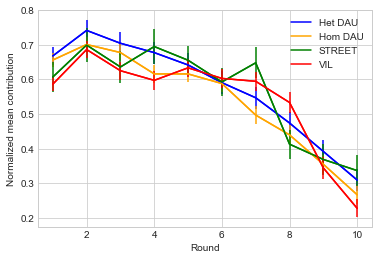

In [26]:
## Plot:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(1, 10, 10)
ax.plot(x, mean_contr_ineq,label="Het DAU", c = "blue")
ax.errorbar(x, mean_contr_ineq, yerr=se_ineq , c = 'blue')
ax.plot(x, mean_contr_eq,label="Hom DAU", c = 'orange')
ax.errorbar(x, mean_contr_eq, yerr=se_eq , c = 'orange')
ax.plot(x, mean_contr_street,label="STREET", c = 'green')
ax.errorbar(x, mean_contr_street, yerr=se_street, c = 'green' )
ax.plot(x, mean_contr_vil,label="VIL", c = 'red')
ax.errorbar(x, mean_contr_vil, yerr=se_vil, c = 'red' )

plt.xlabel('Round')
plt.ylabel('Normalized mean contribution')
plt.legend()
plt.show()

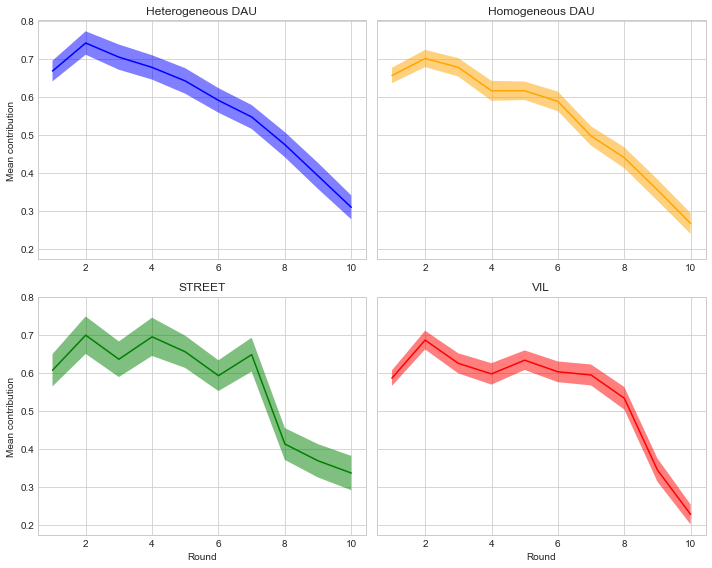

In [27]:
x = np.linspace(1, 10, 10)
y = np.linspace(0, 120, 10)
fig, axs = plt.subplots(2, 2, figsize=(10, 8),sharex=False, sharey=True)

axs[0,0].plot(x, mean_contr_ineq,label="Heterogeneous DAU", c = 'blue')
axs[0,0].fill_between(x, mean_contr_ineq+se_ineq, mean_contr_ineq-se_ineq, facecolor='blue', alpha=0.5)
#axs[0,0].plot(x, y,label="FAIR", c="black")
axs[0,0].set_ylabel('Mean contribution')
axs[0,0].set_title('Heterogeneous DAU')

axs[0,1].plot(x, mean_contr_eq,label="Homogeneous DAU",c = 'orange')
axs[0,1].fill_between(x, mean_contr_eq+se_eq, mean_contr_eq-se_eq, facecolor='orange', alpha=0.5)
#axs[0,1].plot(x, y,label="FAIR", c="black")
axs[0,1].set_title('Homogeneous DAU')

axs[1,0].plot(x, mean_contr_street,label="STREET", c='green')
#axs[1,0].set_xticks(bins[:-1])
axs[1,0].fill_between(x, mean_contr_street+se_street, mean_contr_street-se_street, facecolor='green', alpha=0.5)
axs[1,0].set_xlabel('Round')
axs[1,0].set_ylabel('Mean contribution')
#axs[1,0].plot(x, y,label="FAIR", c="black")
axs[1,0].set_title('STREET')

axs[1,1].plot(x, mean_contr_vil,label="VIL", c='red')
axs[1,1].fill_between(x, mean_contr_vil+se_vil, mean_contr_vil-se_vil, facecolor='red', alpha=0.5)
#axs[1,1].set_xticks(bins[:-1])
axs[1,1].set_xlabel('Round')
#axs[1,1].set_ylabel('Count')
#axs[1,1].plot(x, y,label="FAIR", c="black")
axs[1,1].set_title('VIL')
 
fig.tight_layout()    
plt.show()

#### Mean contribution per group of 6 per round:

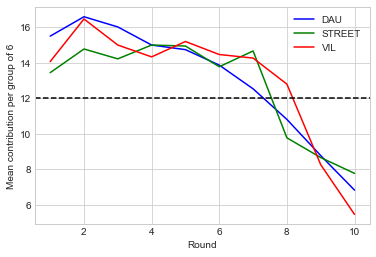

In [28]:
# Mean contribution per round
mean_partida_dau = partides_info_dau.mean(axis=0)
mean_partida_street= partides_info_street.mean(axis=0)
mean_partida_vil = partides_info_vil.mean(axis=0)

#Plot
fig = plt.figure()
ax = plt.axes()

x = np.linspace(1, 10, 10)
ax.plot(x, mean_partida_dau,label="DAU", c='blue')
ax.plot(x, mean_partida_street,label="STREET", c='green')
ax.plot(x, mean_partida_vil,label="VIL", c='red')
ax.axhline(y=12, color='black', linestyle='--')
plt.xlabel('Round')
plt.ylabel('Mean contribution per group of 6')
plt.legend()
plt.show()

This last result is comparable with Milinski et al. 2011

### Accumulated mean contribution per group of 6

In [29]:
ineq_ronda_dau = ronda_dau_data[ronda_dau_data.partida_id.isin(categ_het[categ_het.experiment=='het_dau'].partida_id)]
eq_ronda_dau = ronda_dau_data[ronda_dau_data.partida_id.isin(categ_hom[categ_hom.experiment=='hom_dau'].partida_id)]

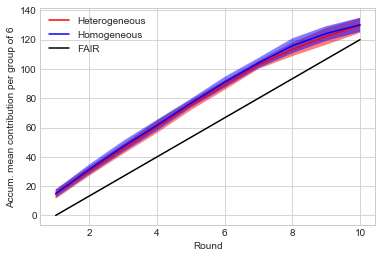

In [30]:
partides_info_dau = ronda_dau_data.pivot(index='partida_id', columns='num_ronda', values= "bucket")
partides_info_ineq = ineq_ronda_dau.pivot(index='partida_id', columns='num_ronda', values= "bucket")
partides_info_eq = eq_ronda_dau.pivot(index='partida_id', columns='num_ronda', values= "bucket")
partides_info_street = ronda_street_data.pivot(index='partida_id', columns='num_ronda', values= "bucket")
partides_info_vil = ronda_vil_data.pivot(index='partida_id', columns='num_ronda', values= "bucket")


heterogeneous_partida = pd.concat([partides_info_ineq, partides_info_street])
homogeneous_partida = pd.concat([partides_info_eq, partides_info_vil])

mean_cumsum_het = heterogeneous_partida.cumsum(axis=1).mean(axis=0)
mean_cumsum_hom = homogeneous_partida.cumsum(axis=1).mean(axis=0)

sigma_het = heterogeneous_partida.std(axis = 0)
sigma_hom = homogeneous_partida.std(axis = 0)


fig = plt.figure()
ax = plt.axes()

x = np.linspace(1, 10, 10)
ax.plot(x, mean_cumsum_het,label="Heterogeneous",c = 'red')
ax.plot(x, mean_cumsum_hom,label="Homogeneous", c='blue')

ax.fill_between(x, mean_cumsum_het+sigma_het, mean_cumsum_het-sigma_het, facecolor='red', alpha=0.5)
ax.fill_between(x, mean_cumsum_hom+sigma_hom, mean_cumsum_hom-sigma_hom, facecolor='blue', alpha=0.5)

y = np.linspace(0, 120, 10)
ax.plot(x, y,label="FAIR", c="black")
plt.xlabel('Round')
plt.ylabel('Accum. mean contribution per group of 6')
plt.legend()
plt.show()

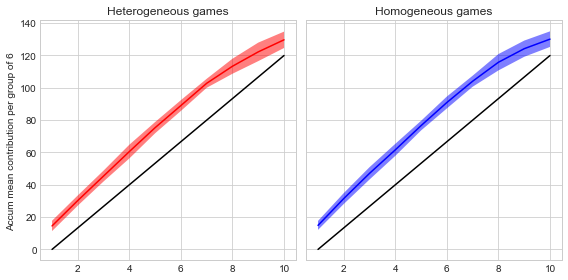

In [31]:
x = np.linspace(1, 10, 10)
y = np.linspace(0, 120, 10)
fig, axs = plt.subplots(1, 2, figsize=(8, 4),sharex=False, sharey=True)

axs[0].plot(x, mean_cumsum_het,label="Heterogeneous",c = 'red')
axs[0].fill_between(x, mean_cumsum_het+sigma_het, mean_cumsum_het-sigma_het, facecolor='red', alpha=0.5)
axs[0].plot(x, y,label="FAIR", c="black")
axs[0].set_ylabel('Accum mean contribution per group of 6')
axs[0].set_title('Heterogeneous games')

axs[1].plot(x, mean_cumsum_hom,label="Homogeneous",c = 'blue')
axs[1].fill_between(x, mean_cumsum_hom+sigma_hom, mean_cumsum_hom-sigma_hom, facecolor='blue', alpha=0.5)
axs[1].plot(x, y,label="FAIR", c="black")
axs[1].set_title('Homogeneous games')

#axs[1,0].plot(x, mean_cumsum_street,label="STREET", c='green')
##axs[1,0].set_xticks(bins[:-1])
#axs[1,0].fill_between(x, mean_cumsum_street+sigma_street, mean_cumsum_street-sigma_street, facecolor='green', alpha=0.5)
#axs[1,0].set_xlabel('Round')
#axs[1,0].set_ylabel('Accum mean contribution')
#axs[1,0].plot(x, y,label="FAIR", c="black")
#axs[1,0].set_title('STREET')
#
#axs[1,1].plot(x, mean_cumsum_vil,label="VIL", c='yellow')
#axs[1,1].fill_between(x, mean_cumsum_vil+sigma_vil, mean_cumsum_vil-sigma_vil, facecolor='yellow', alpha=0.5)
##axs[1,1].set_xticks(bins[:-1])
#axs[1,1].set_xlabel('Round')
##axs[1,1].set_ylabel('Count')
#axs[1,1].plot(x, y,label="FAIR", c="black")
#axs[1,1].set_title('VIL')
 
fig.tight_layout()    
plt.show()

### Total Contribution ratio: PDF and CDF

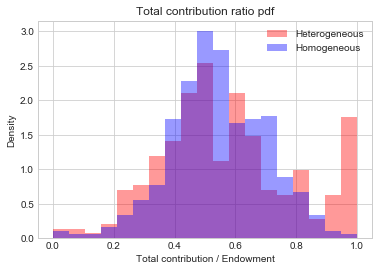

In [32]:
bins = np.linspace(0, 1, 20)

plt.hist(categ_het['contr/budget'], bins, alpha=0.4,density = True, label='Heterogeneous', color = 'red')
plt.hist(categ_hom['contr/budget'], bins, alpha=0.4,density = True, label='Homogeneous', color = 'blue')
plt.xlabel("Total contribution / Endowment")
plt.ylabel("Density")
plt.legend(loc='upper right')
plt.title('Total contribution ratio pdf')
plt.show()

In [33]:
from scipy.stats import chisquare,ttest_ind
## T-test for the different treatment proportional contribution distribution (equal the sum of normalized contributions)
ttest_ind(categ_het['contr/budget'],categ_hom['contr/budget'])

Ttest_indResult(statistic=1.879613240293539, pvalue=0.060637224386175435)

In [34]:
## T-test for the different mean contributions
ttest_ind(categ_het['mean_contr'],categ_hom['mean_contr'])

Ttest_indResult(statistic=-0.12038292941808822, pvalue=0.90421945278142279)

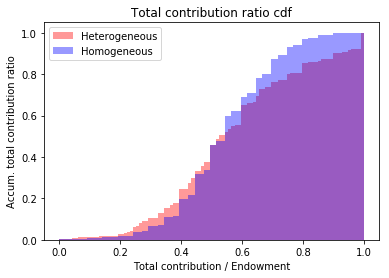

In [48]:
bins = np.linspace(0, 1, 100)

plt.hist(categ_het['contr/budget'], bins, alpha=0.4,density = True, cumulative=True, label='Heterogeneous', color = 'red')
plt.hist(categ_hom['contr/budget'], bins, alpha=0.4,density = True, cumulative=True, label='Homogeneous', color = 'blue')
plt.legend(loc='upper left')
plt.xlabel("Total contribution / Endowment")
plt.ylabel("Accum. total contribution ratio")
plt.title('Total contribution ratio cdf')
plt.show()

### Strategies:

In [26]:
### Free Riding
#contr_dau.count(axis=1)
free_rid_dau = (contr_dau == 0).astype(int).sum(axis=1)

In [27]:
#np.sort(free_rid_dau)
#.sort_values(‘column_z’, ascending=False)

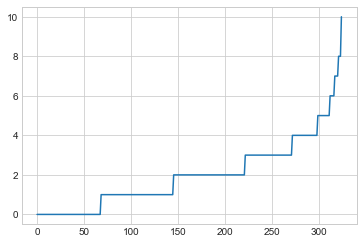

In [28]:
# Free Riding
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, len(np.unique(userronda_dau['user_id'])), len(np.unique(userronda_dau['user_id'])))
ax.plot(x, np.sort(free_rid_dau))

In [29]:
def free_riding(contr_ds,user_ds):
    free_rid = (contr_ds == 0).astype(int).sum(axis=1)
    # Free Riding
    fig = plt.figure()
    ax = plt.axes()

    x = np.linspace(0, len(np.unique(user_ds['user_id'])), len(np.unique(user_ds['user_id'])))
    ax.plot(x, np.sort(free_rid))
    return(free_rid)

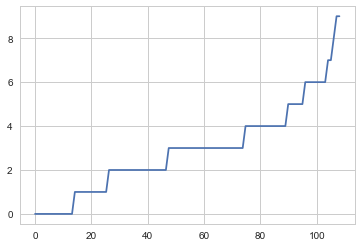

In [30]:
free_rid_street = free_riding(contr_street_norm,user_street)

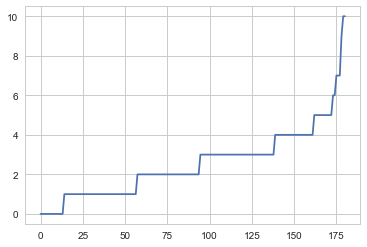

In [31]:
free_rid_vil = free_riding(contr_vil_norm,user_vil)

In [40]:
#free_rid_ineq = free_riding(ineq_contr_dau_norm,ineq_user_dau)

### Principal Component Analysis

#### DAU: 

In [23]:
### Unsupervised clustering (K-MEANS)
### La classe serà el valor del cluster que s'assigna amb un kmeans:
X = contr_dau_norm

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

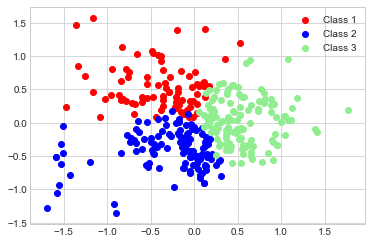

In [24]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_dau_norm))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [25]:
pca.explained_variance_ratio_

array([ 0.26208817,  0.17977144])

#### Heterogeneous DAU:

In [26]:
#ineq_dau_norm = pd.read_csv("dades/ineq_dau.csv", delimiter=',' , encoding="latin-1")
#ineq_contr_dau = contr_dau_norm[contr_dau_norm.index.isin(ineq_dau_norm['user_id'])]

In [27]:
X = ineq_contr_dau_norm

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

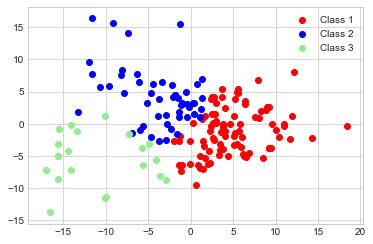

In [28]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [29]:
X = ineq_contr_dau_norm

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

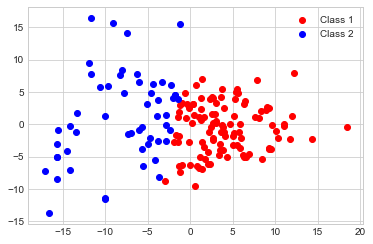

In [30]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
#plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

#### Homogeneous DAU:

In [31]:
#eq_dau = pd.read_csv("dades/eq_dau.csv", delimiter=',' , encoding="latin-1")
#eq_contr_dau = contr_dau_norm[contr_dau_norm.index.isin(eq_dau['user_id'])]

In [32]:
X = eq_contr_dau_norm

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

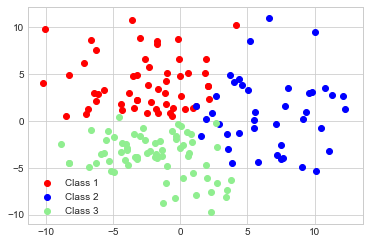

In [33]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [34]:
X = eq_contr_dau_norm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

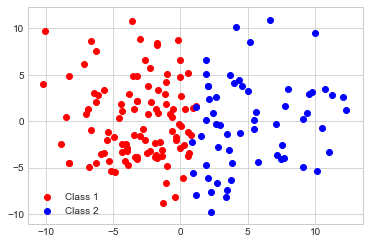

In [35]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
#plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

#### STREET:

In [36]:
### La classe serà el valor del cluster que s'assigna amb un kmeans:
X = contr_street_norm

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

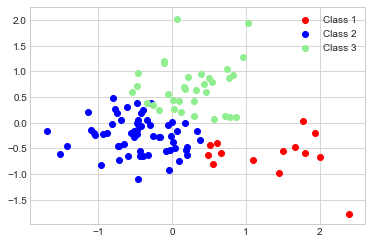

In [37]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_street_norm))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

#### VIL:

In [38]:
### La classe serà el valor del cluster que s'assigna amb un kmeans:
X = contr_vil_norm

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustcoef = kmeans.labels_
y = clustcoef

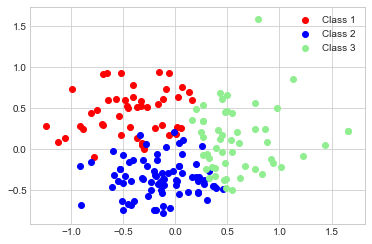

In [39]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_vil_norm))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

### Inserting variables to PCA:

#### DAU:

In [40]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_dau_norm))

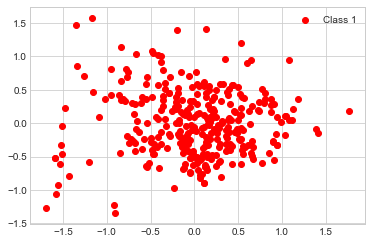

In [41]:
plt.scatter(transformed[0], transformed[1], label='Class 1', c='red')

plt.legend()
plt.show()

In [42]:
## genre
gen = np.asarray(user_dau['genere'])
gen_num = np.where(gen=='d',1,0)

In [43]:
np.unique(user_dau['diners_inicials'])

array([20, 30, 40, 50, 60], dtype=int64)

In [44]:
## diners inicials
din_in = np.asarray(user_dau['diners_inicials'])

In [45]:
for i in range(0,user_dau.shape[0]):
    if din_in[i] == 20:
        din_in[i]=0
    elif din_in[i] == 30:
        din_in[i]=1
    elif din_in[i] == 40:
        din_in[i]=2
    elif din_in[i] == 50:
        din_in[i]=3
    else:
        din_in[i]=4

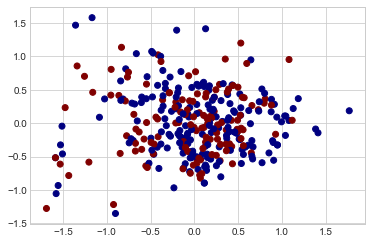

In [46]:
plt.scatter(transformed[0], transformed[1], c=gen_num) # According genre
plt.jet()

plt.show()

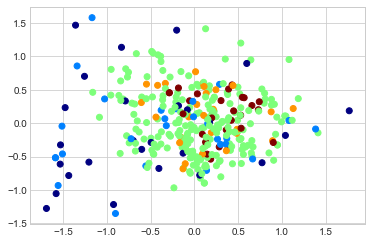

In [47]:
plt.scatter(transformed[0], transformed[1], c=din_in) # According initial budget
plt.jet()

plt.show()

In [73]:
### T-Test to compare mean values:
from scipy import stats
stats.ttest_ind(din_in_clust2,din_in_clust3)
## As p-value < 0.1 --> Reject H0 of equal averages.

Ttest_indResult(statistic=-3.5670975374776734, pvalue=0.00043533801912292634)

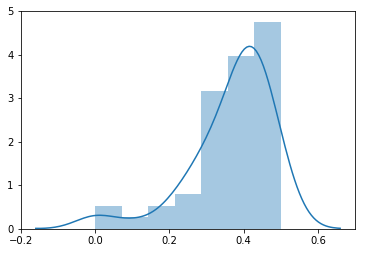

In [24]:
sns.distplot(mean_contr_user_clust3)

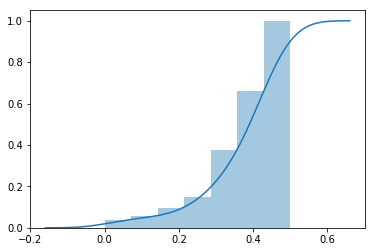

In [25]:
sns.distplot(mean_contr_user_clust3,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

In [75]:
X = np.asarray(contr_dau_norm)
# generate the linkage matrix
Z = linkage(X, 'ward')

In [145]:
c, coph_dists = cophenet(Z, pdist(X))
c

0.30483957448028776

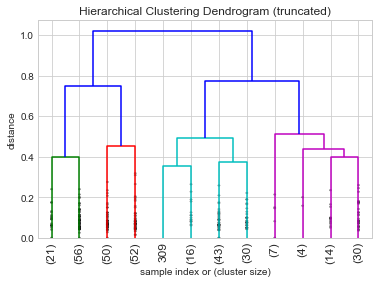

In [146]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

#### STREET

In [156]:
X = np.asarray(contr_street_norm)
# generate the linkage matrix
Z = linkage(X, 'ward')


In [157]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.46278268935359179

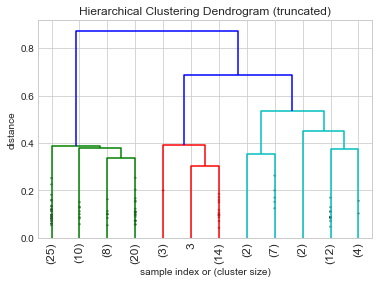

In [158]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [159]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.6
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

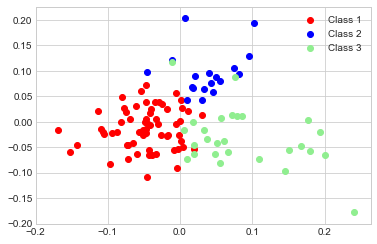

In [160]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(contr_street_norm))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [161]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.8
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

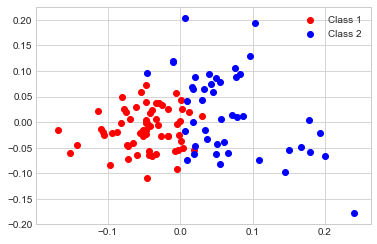

In [162]:
transformed = pd.DataFrame(pca.fit_transform(contr_street_norm))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
#plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

#### Heterogènies DAU

In [97]:
ineq_dau = pd.read_csv("dades/ineq_dau.csv", delimiter=',' , encoding="latin-1")
ineq_contr_dau = contr_dau_norm[contr_dau_norm.index.isin(ineq_dau['user_id'])]

In [98]:
X = np.asarray(ineq_contr_dau)
# generate the linkage matrix
Z = linkage(X, 'ward')

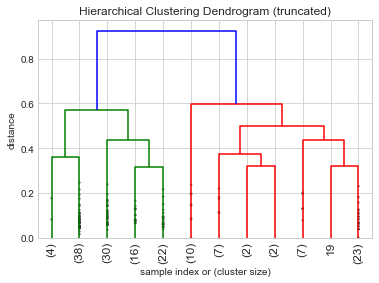

In [99]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [100]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.6
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

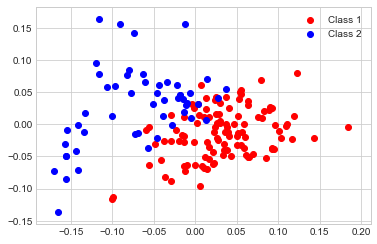

In [101]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(ineq_contr_dau))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
#plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [102]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.59
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

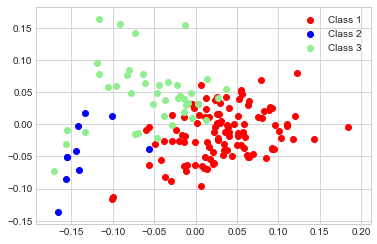

In [104]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(ineq_contr_dau))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

#### Homogènies DAU:

In [130]:
eq_dau = pd.read_csv("dades/eq_dau.csv", delimiter=',' , encoding="latin-1")
eq_contr_dau = contr_dau_norm[contr_dau_norm.index.isin(eq_dau['user_id'])]

In [131]:
X = np.asarray(eq_contr_dau)
# generate the linkage matrix
Z = linkage(X, 'ward')

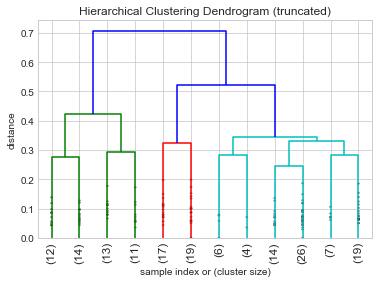

In [132]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [135]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.50 # Selecting 3 clusters
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

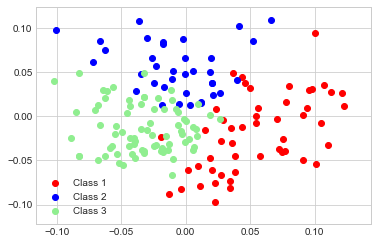

In [136]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(eq_contr_dau))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [133]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.55 # Selecting 2 clusters
clusters = fcluster(Z, max_d, criterion='distance')
y = clusters

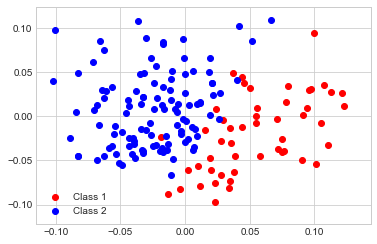

In [134]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(eq_contr_dau))

plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
#plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')
plt.legend()
plt.show()

In [165]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

### Following Milinski 2006, and Milinski 2007; look for the number of times that people put 0, 2 or 4:  

In [52]:
## Percentage of users that contributes from 0 to 4 MU

#Heterogeneous case: (max 2 with 48.9%)
print(list(dict(heterogeneous.iloc[:,0].value_counts().sort_index()).values())/sum(dict(heterogeneous.iloc[:,0].value_counts()).values()))

#Homogeneous case: (max 2 with 60.5%)
print(list(dict(homogeneous.iloc[:,0].value_counts().sort_index()).values())/sum(dict(homogeneous.iloc[:,0].value_counts()).values()))

[ 0.1         0.03703704  0.48888889  0.08888889  0.28518519]
[ 0.05263158  0.01754386  0.60526316  0.0497076   0.2748538 ]


In [14]:
import sys
def acum_contr_dau(contr_ds):
    fair = []
    for i in range(0,contr_ds.shape[1]):
        contr_street.iloc[:,i].value_counts()
        for j in [0,1,2,3,4]:
            fair.append(contr_ds.iloc[:,i].value_counts()[j])
    acum_contr = np.reshape(fair, (10, 5))
    return(acum_contr)

In [59]:
acum_contr_eq = acum_contr_dau(eq_contr_dau)
acum_contr_ineq = acum_contr_dau(ineq_contr_dau)

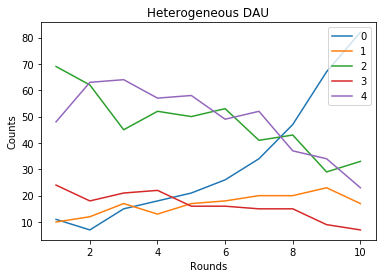

In [66]:
# Heterogeneous DAU
fig = plt.figure()
ax = plt.axes()
x = np.linspace(1, 10, 10)
ax.plot(x, acum_contr_ineq.T[0],label="0")
ax.plot(x, acum_contr_ineq.T[1],label="1")
ax.plot(x, acum_contr_ineq.T[2],label="2")
ax.plot(x, acum_contr_ineq.T[3],label="3")
ax.plot(x, acum_contr_ineq.T[4],label="4")
ax.set_xlabel('Rounds')
ax.set_ylabel('Counts')
ax.set_title('Heterogeneous DAU')
plt.legend()
plt.show()

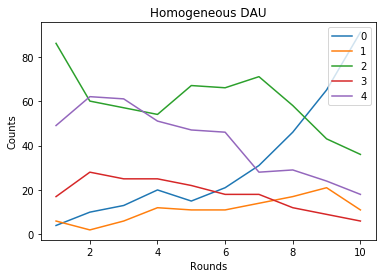

In [67]:
# Homogeneous DAU
fig = plt.figure()
ax = plt.axes()
x = np.linspace(1, 10, 10)
ax.plot(x, acum_contr_eq.T[0],label="0")
ax.plot(x, acum_contr_eq.T[1],label="1")
ax.plot(x, acum_contr_eq.T[2],label="2")
ax.plot(x, acum_contr_eq.T[3],label="3")
ax.plot(x, acum_contr_eq.T[4],label="4")
ax.set_xlabel('Rounds')
ax.set_ylabel('Counts')
ax.set_title('Homogeneous DAU')
plt.legend()
plt.show()

In [68]:
import sys
def acum_contr(contr_ds):
    fair = []
    for i in range(0,contr_ds.shape[1]):
        contr_ds.iloc[:,i].value_counts()
        for j in [0,2,4]:
            fair.append(contr_ds.iloc[:,i].value_counts()[j])
    acum_contr = np.reshape(fair, (10, 3))
    return(acum_contr)

In [69]:
acum_contr_street = acum_contr(contr_street)
acum_contr_vil = acum_contr(contr_vil)

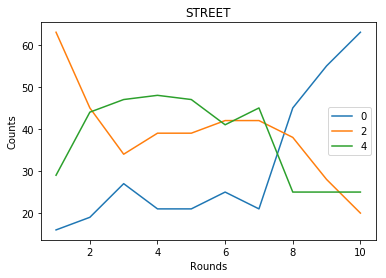

In [70]:
# STREET

fig = plt.figure()
ax = plt.axes()
x = np.linspace(1, 10, 10)
ax.plot(x, acum_contr_street.T[0],label="0")
ax.plot(x, acum_contr_street.T[1],label="2")
ax.plot(x, acum_contr_street.T[2],label="4")
ax.set_xlabel('Rounds')
ax.set_ylabel('Counts')
ax.set_title('STREET')
plt.legend()
plt.show()

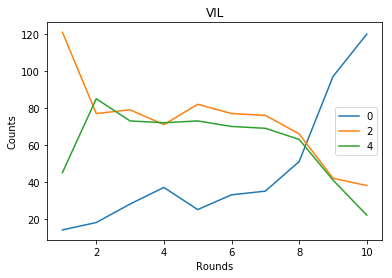

In [71]:
# VIL

fig = plt.figure()
ax = plt.axes()
x = np.linspace(1, 10, 10)
ax.plot(x, acum_contr_vil.T[0],label="0")
ax.plot(x, acum_contr_vil.T[1],label="2")
ax.plot(x, acum_contr_vil.T[2],label="4")
ax.set_xlabel('Rounds')
ax.set_ylabel('Counts')
ax.set_title('VIL')
plt.legend()
plt.show()